In [1]:
#set up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# read the csv file
df=pd.read_csv(r"C:\Users\ivan3\Documents\Visual Studio 2017\Projects\csv file\StudentsPerformance.csv")
print(df.head())
print(f"Shape of DataFrame: total rows={df.shape[0]} and total columns={df.shape[1]}.")

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                     college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                     college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Shape of DataFrame: total rows=1053 and total columns=8.


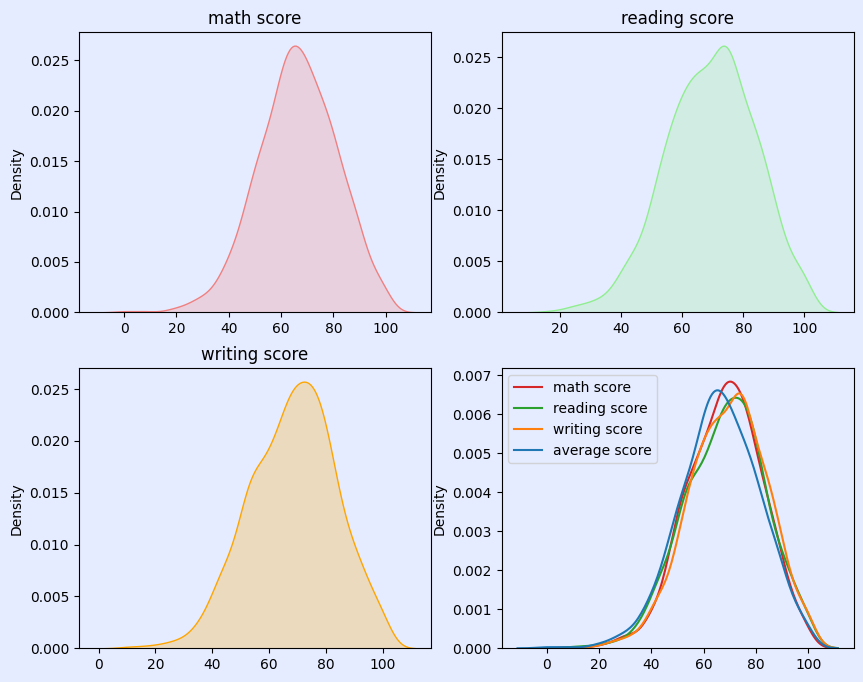

In [2]:
#The distribution of ["math score", "reading score", "writing score"]
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
df["average score"]=df[["math score", "reading score", "writing score"]].mean(axis=1)
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.kdeplot(data=df["math score"], color="lightcoral",shade=True,ax=axes[0,0]).set(title="math score",xlabel=None)
sns.kdeplot(data=df["reading score"], color="lightgreen",shade=True, ax=axes[0,1]).set(title="reading score",xlabel=None)
sns.kdeplot(data=df["writing score"], color="orange",shade=True, ax=axes[1,0]).set(title="writing score",xlabel=None)
sns.kdeplot(data=df[["math score","reading score","writing score","average score"]], ax=axes[1,1])
plt.legend(labels=("math score","reading score","writing score","average score"),loc='upper left')
plt.show()

Observation: All distribution follow an approximately normal distribution.

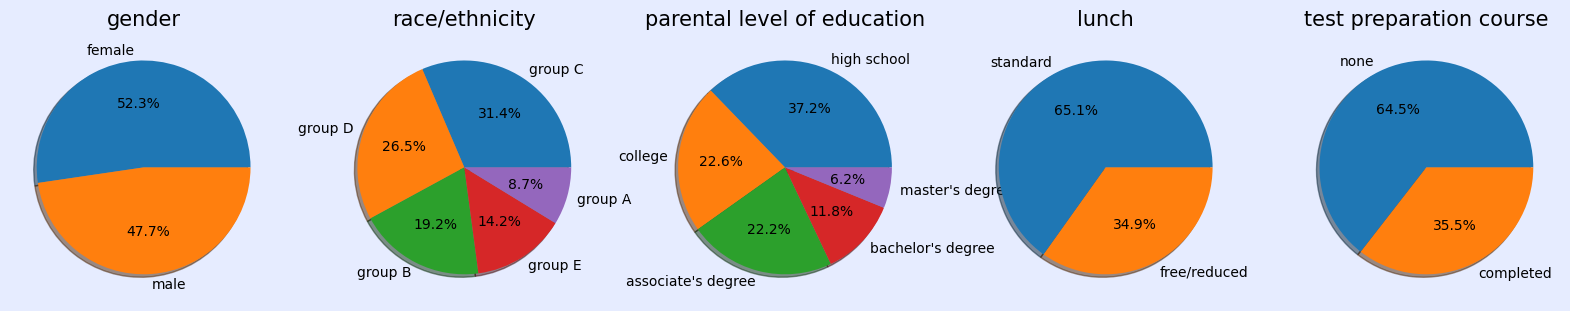

In [3]:
#percentage of gender, race/ethnicity, parental level of education, lunch, test preparation course.
df_col=df.select_dtypes(include=["object"])
plt.figure(figsize=(20,8))
for i,col in enumerate( list(df_col.columns) ):
    plt.subplot(1,5,i+1)
    plt.title(col, fontsize=15)
    df[col].value_counts().plot(kind="pie", shadow=True, ylabel="", autopct="%1.1f%%")
plt.show()

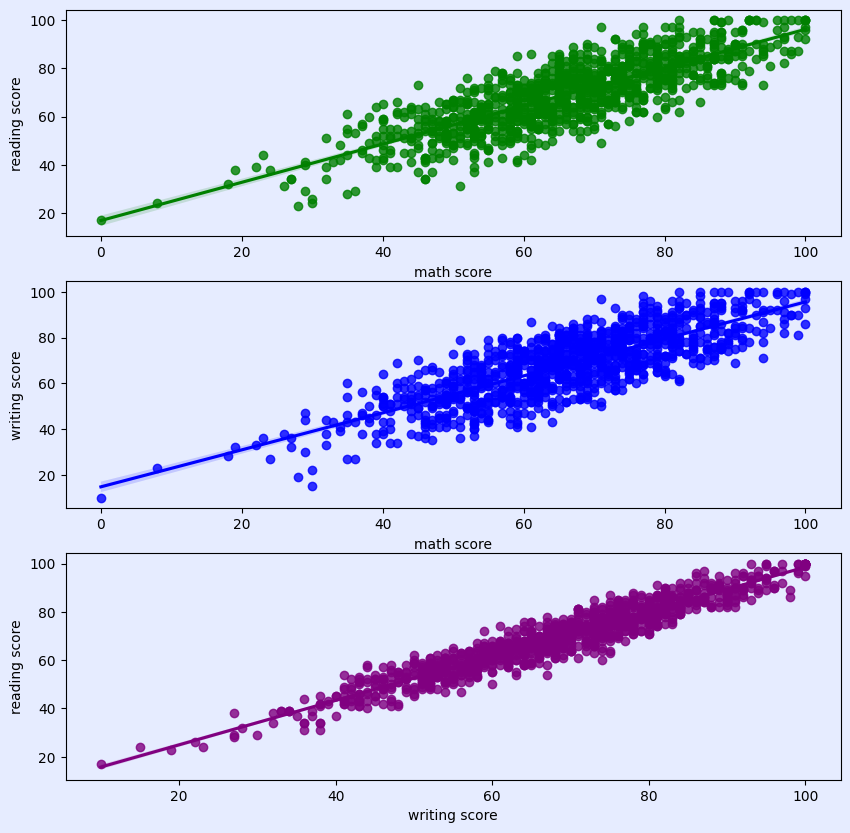

In [4]:
#The relationship between different score
#["math score","reading score","writing score","average score"]
fig,axes = plt.subplots(3,1,figsize=(10,10))
sns.regplot(x="math score", y="reading score", data=df,color="g",ax=axes[0])
sns.regplot(x="math score", y="writing score", data=df,color="b",ax=axes[1])
sns.regplot(x="writing score", y="reading score", data=df,color="purple",ax=axes[2])
plt.show()

Observation: All scores have a positive correlation with each other.

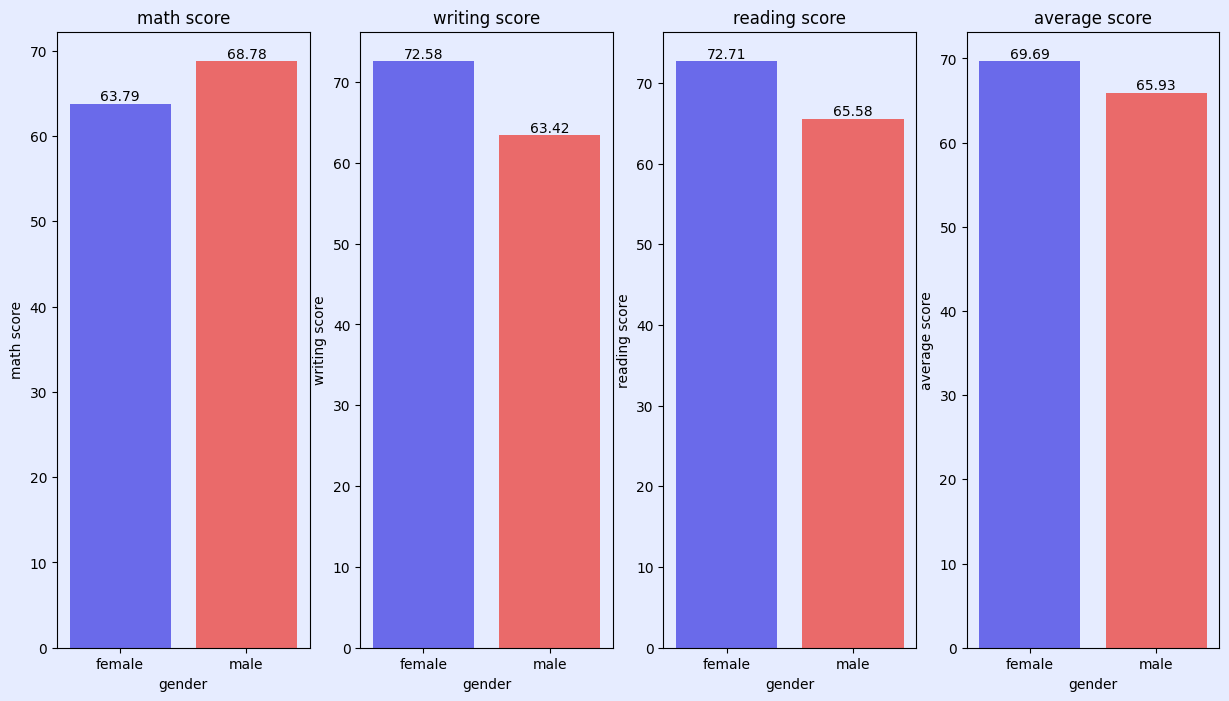

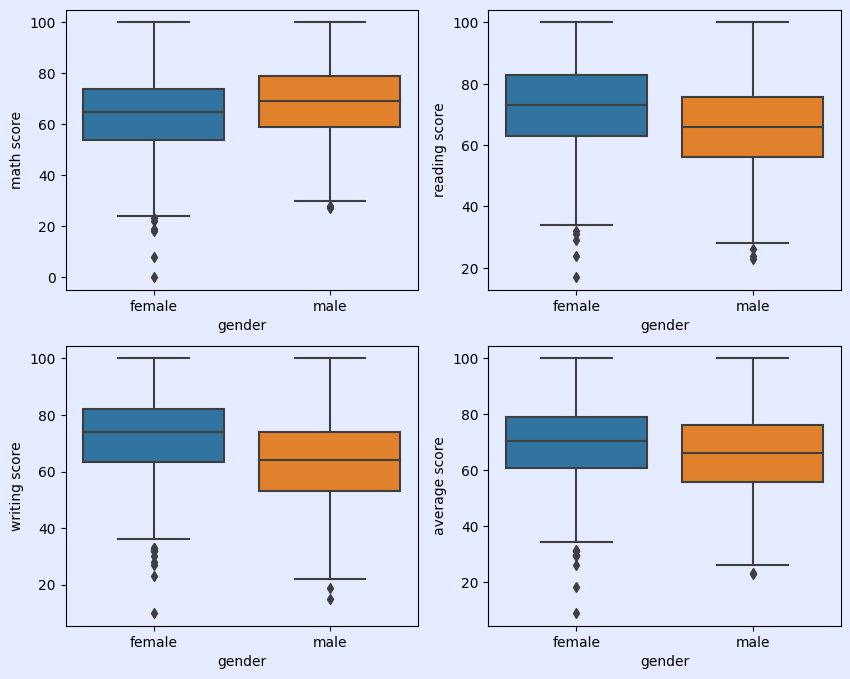

In [5]:
#The relationship between gender and score
plt.figure(figsize=(15,8))
for i,score in enumerate(["math score", "writing score", "reading score", "average score"]):
    plt.subplot(1,4,i+1)
    ax=sns.barplot(x="gender", y=score, data=df, palette="seismic", ci=None)
    plt.title(f'{score}')
    ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

fig,axes = plt.subplots(2,2,figsize=(10,8))
ax=axes.flatten()
for i,score in enumerate(["math score","reading score","writing score","average score"]):
    sns.boxplot(x="gender", y=score, data=df, ax=ax[i])

Observation: Boys perform better than girls in math but perform worse than girls in both reading and writing test. Overall, Girls get a slightly higher average score.

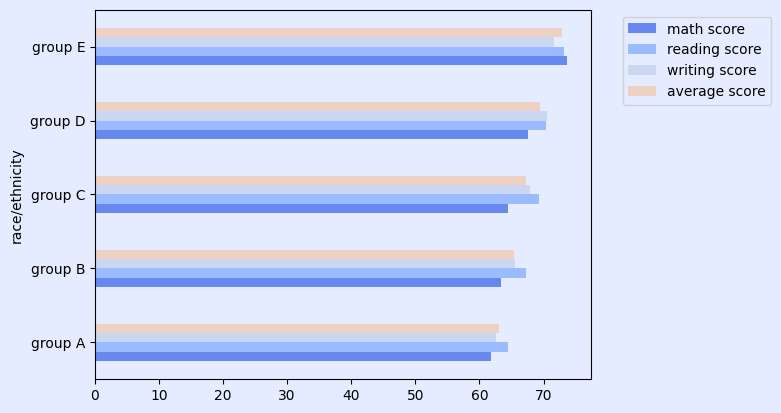

In [6]:
#The relationship between race/ethnicity and score
race=df.groupby("race/ethnicity")[['math score', 'reading score', 'writing score',"average score"]].mean()

sns.set_palette("coolwarm")
ax=race.plot.barh()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Observation: On average, group E get the best result and group A get the worst result at all three tests.

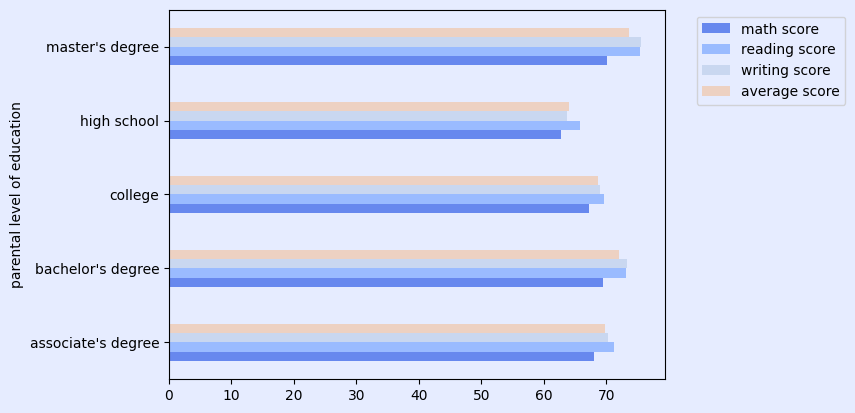

In [7]:
#The relationship between parental level of education and score
education=df.groupby("parental level of education")[['math score', 'reading score', 'writing score',"average score"]].mean()

sns.set_palette("coolwarm")
ax=education.plot.barh()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Observation: When students' parent have a bachelor's degree or master's degree, the students seem to have a better average results.

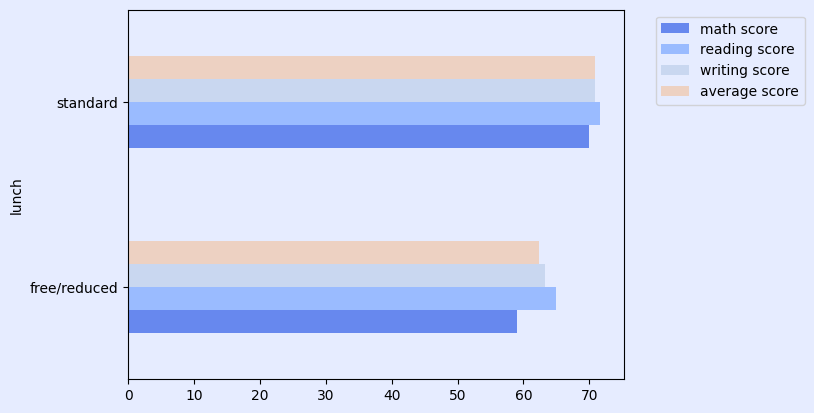

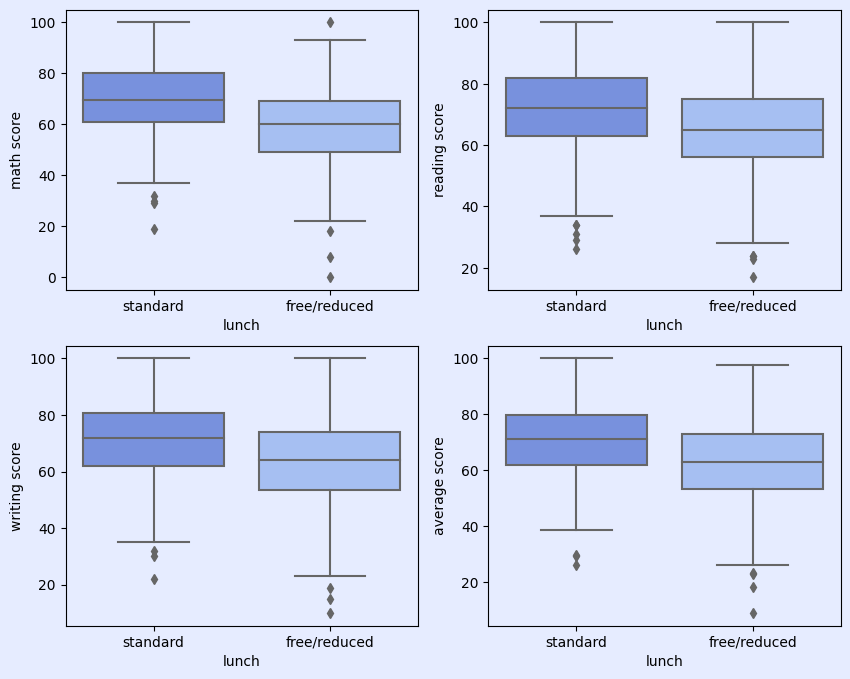

In [8]:
#The relationship between having lunch and score
lunch=df.groupby("lunch")[['math score', 'reading score', 'writing score',"average score"]].mean()
ax=sns.set_palette("coolwarm")
ax=lunch.plot.barh()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

fig,axes = plt.subplots(2,2,figsize=(10,8))
ax=axes.flatten()
for i,score in enumerate(["math score","reading score","writing score","average score"]):
    sns.boxplot(x="lunch", y=score, data=df, ax=ax[i])

Observation: It is obvious that keeping a balanced diet will improve your academic results.

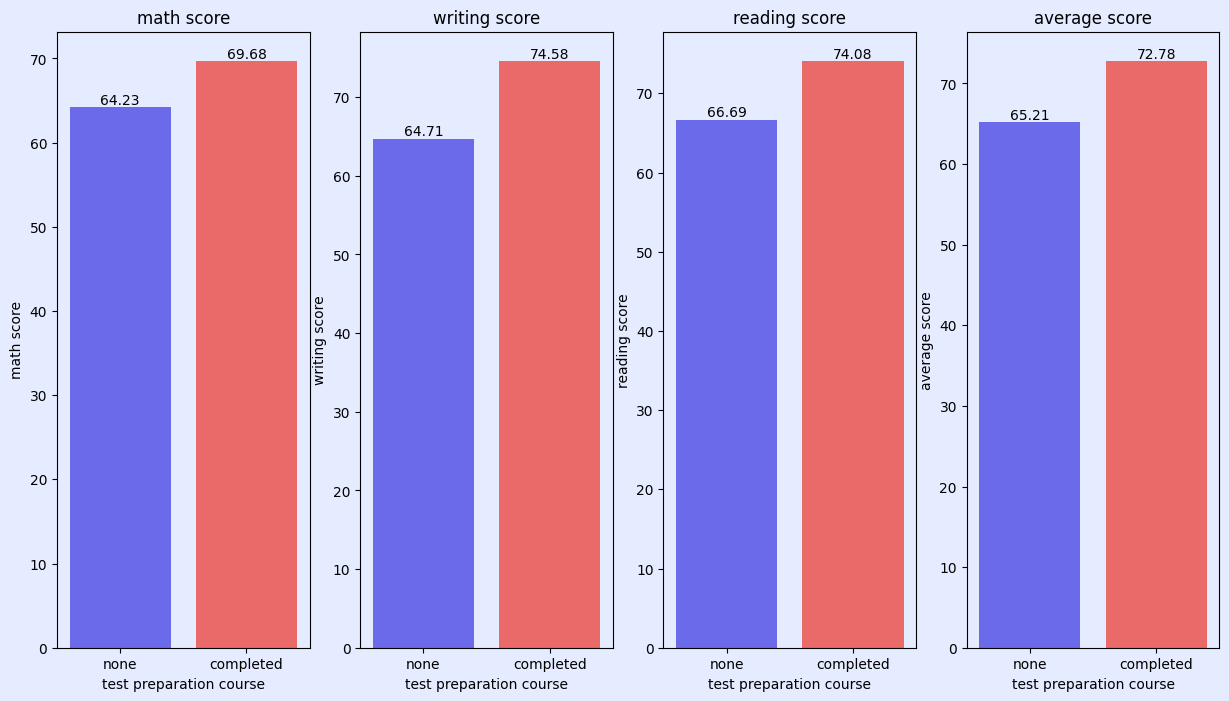

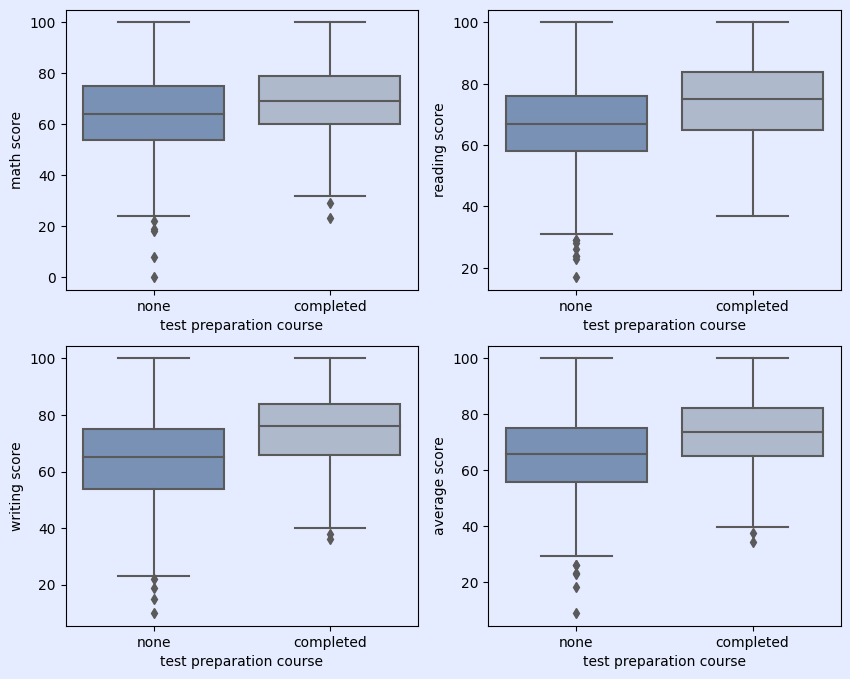

In [9]:
#The relationship between test preparation course and score
plt.figure(figsize=(15,8))
for i,score in enumerate(["math score", "writing score", "reading score", "average score"]):
    plt.subplot(1,4,i+1)
    ax=sns.barplot(x="test preparation course", y=score, data=df, palette="seismic", ci=None)
    plt.title(f'{score}')
    ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

fig,ax = plt.subplots(2,2,figsize=(10,8))
ax=ax.flatten()
sns.set_palette("vlag")
for i, score in enumerate(['math score', 'reading score', 'writing score',"average score"]):
    sns.boxplot(x="test preparation course", y=score, data=df, ax=ax[i])
plt.show()

Observation: On average, students who completed the test preparation course performed better on the test.


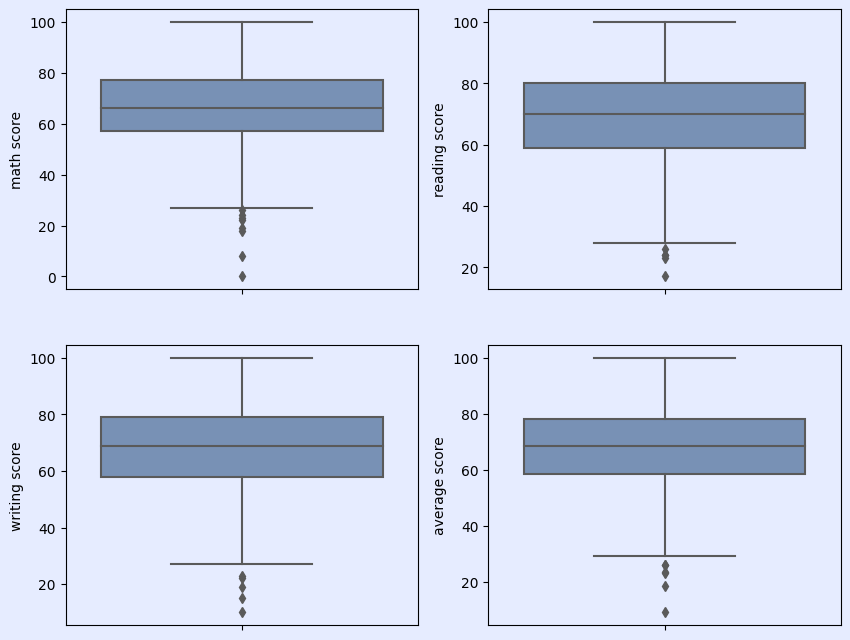

In [10]:
#finding outlier
fig,ax=plt.subplots(2,2,figsize=(10,8))
ax=ax.flatten()
for i,score in enumerate(['math score', 'reading score', 'writing score',"average score"]):
    sns.boxplot( y=score,data=df,ax=ax[i])
plt.show()

In [11]:
#remove outlier
def outlier(df, column):
    global lower, upper
    q1,q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr=q3-q1
    cut_off=iqr*1.5
    lower,upper =q1-cut_off,q3+cut_off
    print("iqr :", iqr,"\n","lower fence :", lower ,"\n", "upper fence :", upper)

    df_lower=df[df[column]<lower]
    df_upper=df[df[column]>upper]
    print (df_lower.shape,df_upper.shape)

    df=df[ (df[column]>lower) & (df[column]<upper)]
    return df

for score in ['math score', 'reading score', 'writing score',"average score"]:
    df=outlier(df, score)

print(df.shape)

iqr : 20.0 
 lower fence : 27.0 
 upper fence : 107.0
(8, 9) (0, 9)
iqr : 20.0 
 lower fence : 30.0 
 upper fence : 110.0
(6, 9) (0, 9)
iqr : 21.0 
 lower fence : 26.5 
 upper fence : 110.5
(0, 9) (0, 9)
iqr : 19.333333333333336 
 lower fence : 29.66666666666666 
 upper fence : 107.0
(0, 9) (0, 9)
(1037, 9)


Observation: The row of DataFrame decreases from 1054 to 1037, It means we remove 17 outliers.

In [12]:
#finding all columns which contain categorical data
o=(df.dtypes=="object")
object_col=list(o[o].index)
print("object_columns :", object_col)

object_columns : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
#convert categorical variable to numeric variable
#using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

#create a new DataFrame 
df_new=df.copy()
for columns in object_col:
    df_new[columns]=label_encoder.fit_transform(df[columns])

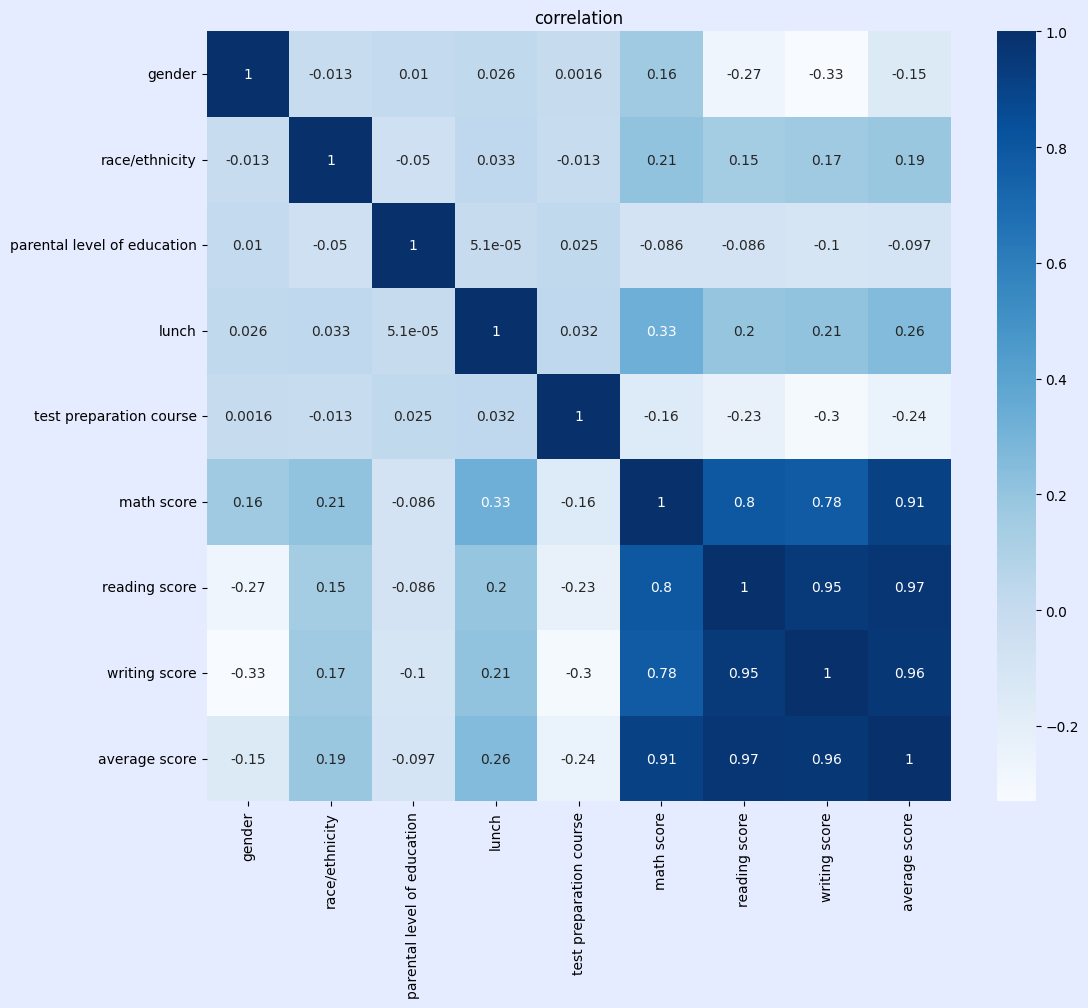

In [14]:
#the correlation between each columns
plt.figure(figsize=(12,10))
plt.title("correlation")
sns.heatmap(data=df_new.corr(), annot=True, cmap="Blues")
plt.show()

In [15]:
#student performance prediction
y=df_new["average score"]
print(y.info())

X=df_new.drop(["average score", "math score", "writing score", "reading score"], axis=1)
print(X.info())

<class 'pandas.core.series.Series'>
Int64Index: 1037 entries, 0 to 1052
Series name: average score
Non-Null Count  Dtype  
--------------  -----  
1037 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1052
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1037 non-null   int32
 1   race/ethnicity               1037 non-null   int32
 2   parental level of education  1037 non-null   int32
 3   lunch                        1037 non-null   int32
 4   test preparation course      1037 non-null   int32
dtypes: int32(5)
memory usage: 28.4 KB
None


The mean_absolute_error of prediction : 10.158727114942577
         actual    predict
2     92.666667  72.244974
3     49.333333  61.404709
10    54.666667  67.992117
24    75.000000  73.077076
26    59.333333  57.181666
...         ...        ...
1016  48.000000  67.000065
1026  62.000000  55.269929
1030  86.000000  76.769866
1032  85.666667  77.475319
1048  56.666667  68.919915

[208 rows x 2 columns]


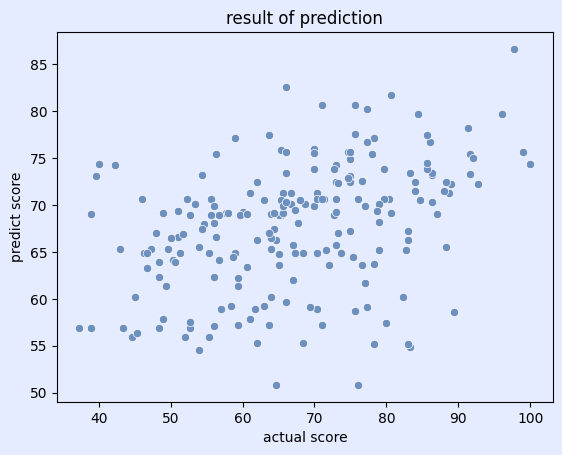

In [16]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y= train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500, max_depth=6)
model.fit(train_X, train_y)
predict=model.predict(val_X)

from sklearn.metrics import mean_absolute_error
result=pd.DataFrame({"actual":val_y, "predict":predict})
print("The mean_absolute_error of prediction :", mean_absolute_error(val_y,predict))
print(result.sort_index(axis=0))

sns.scatterplot(x=val_y,y=predict)
plt.title("result of prediction")
plt.xlabel("actual score")
plt.ylabel("predict score")
plt.show()

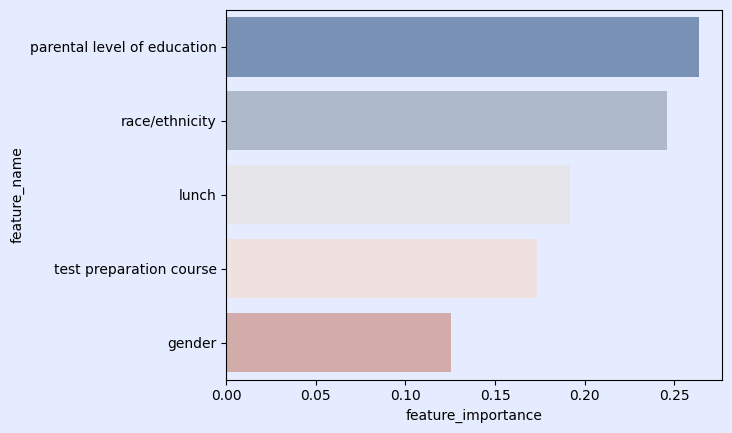

In [17]:
#feature importance
feature_importance = np.array(model.feature_importances_)
feature_name=np.array(train_X.columns)
feature_df=pd.DataFrame({"feature_importance":feature_importance, "feature_name":feature_name})
feature_df=feature_df.sort_values(by=["feature_importance"], ascending=False)
sns.barplot(x=feature_df["feature_importance"], y=feature_df["feature_name"])
plt.show()

Observation: From the graph, we know that having balanced diet and attending the test preparation course are the two biggest factors to improve our academic result.

Further study:

1.adding more features, such as study hour per week / pass test score / interest of the subjects / teaching method ...

2.increae the sample size to get better prediction